In [116]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
sim = Aer.get_backend('aer_simulator')
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-05 11:11:14,101: Credentials are already in use. The existing account in the session will be replaced.


In [117]:
a=11
b=6
# a nd b are two numbers that we need to compare
n=101  #call it as accuracy factoe #need to be only odd but can be as large as you want,also theorectically but limited by you specific system memory here

x= (a+2-b)/2
y= (-a+2+b)/2

def sigmoid(z):
    return 1/(1+np.exp(-z))
    
xnew= sigmoid(x**n)/np.sqrt(((sigmoid(x**n))**2)+((sigmoid(y**n))**2))
ynew= sigmoid(y**n)/np.sqrt(((sigmoid(x**n))**2)+((sigmoid(y**n))**2))



                          


/tmp/ipykernel_59/4171598134.py:10: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


In [118]:

qc= QuantumCircuit(1,1)

vector=[xnew,ynew]
initial_state = vector/np.linalg.norm(vector) #normalized it again to be just sure and compensate for any precision error
qc.initialize(vector,0) 

In [119]:
qc.measure(0,0)

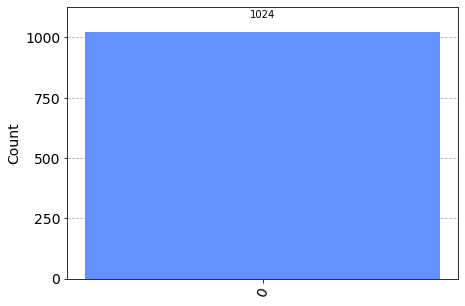

In [120]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)